In [292]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime

# PCA 3 for reduced features

The number of optimal features has been reduced to 14 via RFE-SVM. To select the most suitable HRTF, PCA will be applied to construct components that have the greatest amount of variance. Once the data has been projected onto these components, the nearest fit will be identified by finding the point with the least euclidean distance from the inserted datapoint.

In [293]:
# Optimal features from SVM-RFE
feats1 = np.array([ 0,  1,  2,  3,  4,  5,  6, 15, 16, 21, 28, 29, 32, 34])
feats2 = np.array([ 0,  1,  2,  5,  6,  7,  8, 11, 12, 15, 20, 23, 24, 34])
feats3 = np.array([ 1,  2,  5,  7,  8,  9, 10, 11, 13, 16, 23, 28, 29, 34])

In [294]:
# Importing anthro data
csv_path = "C:\\Users\\simon\\OneDrive\\Documents\\Senior Thesis\\Code\\Datasets\\HUTUBS\\AntrhopometricMeasures.csv"
anthro = np.loadtxt(csv_path, delimiter=',', skiprows=1)
anthred = np.delete(anthro, [0], axis=1)
anthred2 = np.delete(anthred, [0,17,78,87,91,95], axis=0)
np.shape(anthred2)

(90, 35)

In [295]:
np.shape(anthred2[:,feats1])

(90, 14)

In [296]:
# Removing uneeded features depending on class

anthred21 = np.copy(anthred2[:,feats1])
anthred22 = np.copy(anthred2[:,feats2])
anthred23 = np.copy(anthred2[:,feats3])
np.shape(anthred21)


(90, 14)

In [297]:
# Standardisation
stn1 = StandardScaler().fit_transform(anthred21)
stn2 = StandardScaler().fit_transform(anthred22)
stn3 = StandardScaler().fit_transform(anthred23)

Text(0.5, 1.0, 'Cumulative explained variance against component number, Threshold 1')

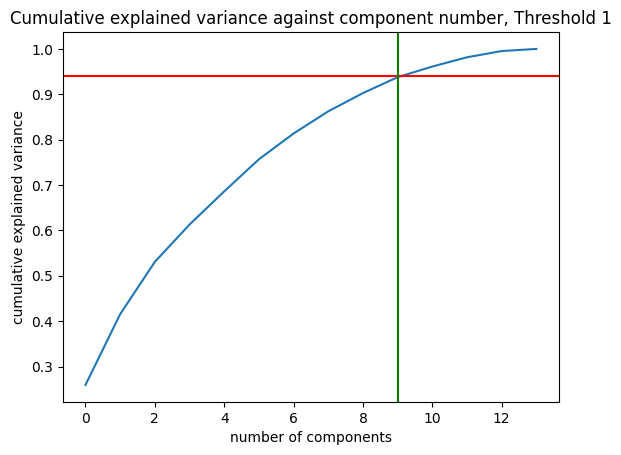

In [298]:
pca1 = PCA().fit(stn1)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.94, color='r', linestyle='-')
plt.axvline(x=9, color='g', linestyle='-')
plt.title('Cumulative explained variance against component number, Threshold 1')

Text(0.5, 1.0, 'Cumulative explained variance against component number, Threshold 2')

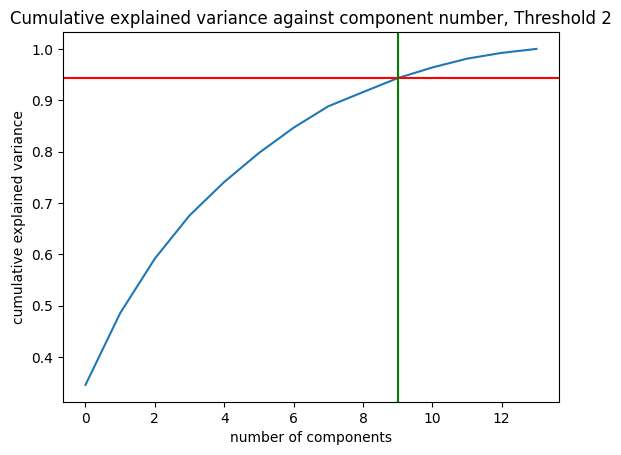

In [299]:
pca2 = PCA().fit(stn2)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.943, color='r', linestyle='-')
plt.axvline(x=9, color='g', linestyle='-')
plt.title('Cumulative explained variance against component number, Threshold 2')

Text(0.5, 1.0, 'Cumulative explained variance against component number, Threshold 3')

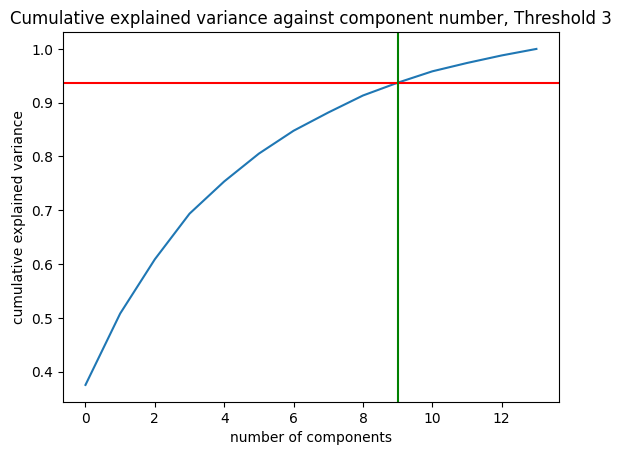

In [300]:
pca3 = PCA().fit(stn3)
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.937, color='r', linestyle='-')
plt.axvline(x=9, color='g', linestyle='-')
plt.title('Cumulative explained variance against component number, Threshold 3')

9 Principal components will be used to transform the data. The test subject is the previously excluded subject 1, whose anthropometric data will be transformed and the smallest euclidean distance between their data and others in the data will be compared.



In [301]:
pca1 = PCA(9)  # project from 37 to 9 dimensions
projected1 = pca1.fit_transform(stn1)

pca2 = PCA(9)  # project from 37 to 9 dimensions
projected2 = pca2.fit_transform(stn2)

pca3 = PCA(9)  # project from 37 to 9 dimensions
projected3 = pca3.fit_transform(stn3)


In [302]:
# Import test subject data
test1 = anthred[0,feats1]
test2 = anthred[0,feats2]
test3 = anthred[0,feats3]

In [303]:
# Projecting test data onto components
start_time = datetime.now()

test1_tr = pca1.transform(test1.reshape(1,-1))
test2_tr = pca2.transform(test2.reshape(1,-1))
test3_tr = pca3.transform(test3.reshape(1,-1))

### The matching algorithm will work as follows: 

1) The PC of each data point will be multiplied by its explained variance ratio to weight the data
2) The PCs of the test data will be have the euclidean distance found from all the training data
3) The datapoint with the smallest e dist will be the nearest match

In [304]:
# Multiplying each row by the ratio

w_pc_data1 = projected1 * pca1.explained_variance_ratio_
w_pc_data2 = projected2 * pca2.explained_variance_ratio_
w_pc_data3 = projected3 * pca1.explained_variance_ratio_

w_test1_tr = test1_tr * pca1.explained_variance_ratio_
w_test2_tr = test2_tr * pca2.explained_variance_ratio_
w_test3_tr = test3_tr * pca3.explained_variance_ratio_

In [305]:
# Finding e distance
dd1 = np.zeros(w_pc_data1.shape[0])
dd2 = np.zeros_like(dd1)
dd3 = np.zeros_like(dd1)

for i in range(len(dd1)):
    dd1[i] = np.linalg.norm(w_pc_data1[i] - w_test1_tr)
    dd2[i] = np.linalg.norm(w_pc_data2[i] - w_test2_tr)
    dd3[i] = np.linalg.norm(w_pc_data3[i] - w_test3_tr)



In [306]:
sub1 = np.where(np.argsort(dd1) == 0 )[0][0]
sub2 = np.where(np.argsort(dd2) == 0 )[0][0]
sub3 = np.where(np.argsort(dd3) == 0 )[0][0]
end_time = datetime.now()

In [307]:
print(sub1, sub2, sub3)
print('Duration: {}'.format(end_time - start_time))

74 66 62
Duration: 0:00:00.076716


According to the three error classes, the test subject's anthropometric features are most similar to subjects 77, 69, 63.

The localisation error will be assesed with the wierstorf model first, then potentialy the baumerli